In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics


dataset = 'https://raw.githubusercontent.com/Axel02leon/Intro-to-Machine-Learning-/refs/heads/main/Homework_3/diabetes.csv'
df = pd.read_csv(dataset)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Problem 1
- Using diabetes dataset
- Build logisitic regression and evaluation
- Report results (accuracy, precision, recall, and F1 score)
- Plot confusion matrix

In [ ]:
# Set the input and outcome variables
input = df.iloc[:, :8].values
outcome = df.iloc[:, 8].values
print(input)
print(outcome)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [ ]:
# Split data into 80% and 20%
X_train, X_test, Y_train, Y_test = train_test_split(input, outcome, test_size=0.2, random_state=42)

In [ ]:
# Proper Scaling and Standardization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled Training set shape: {X_train_scaled.shape}")
print(f"Scaled Test set shape: {X_test_scaled.shape}")

Scaled Training set shape: (614, 8)
Scaled Test set shape: (154, 8)


In [ ]:
# Build model and fit to training variables
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Make predictions on test data
Y_pred = model.predict(X_test)

In [ ]:
# Track accuracy of model, getting the probability of positive outcome
Y_prob = model.predict_proba(X_test)[:, :1]

In [ ]:
# Using a confusion martix to get model accuaracy
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[83, 16],
       [21, 34]])

In [ ]:
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1-Score: ", metrics.f1_score(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy:  0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182
F1-Score:  0.6476190476190476

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



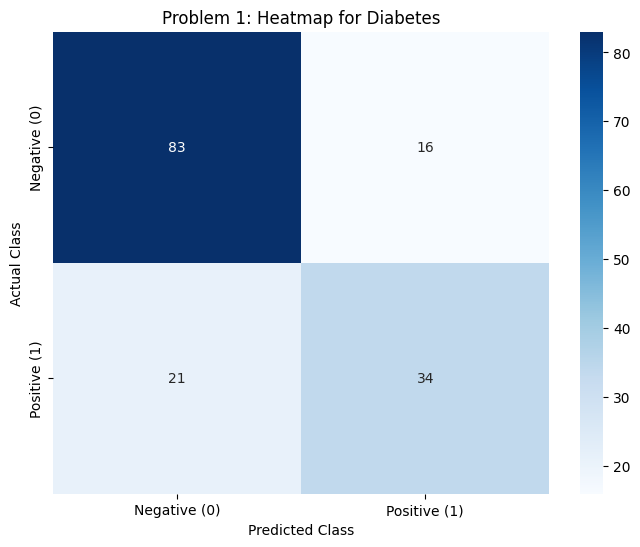

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative (0)", "Positive (1)"], yticklabels=["Negative (0)", "Positive (1)"])

plt.title('Problem 1: Heatmap for Diabetes')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Problem 2 - Part 1
*   Use the cancer data set
*   Build logistic regression model (Malignant vs. benign)
*   Report results (accuracy, precision, recall, and F1 score)
*   Plot confusion matrix

In [2]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()


In [3]:
# Input variable takes the 30 classifications from the breast.data array
input = breast.data

# Output variable takes the data from breast.target, 0 = benign and 1 = malignant
output = breast.target

print(f"Input shape: {input.shape}")
print(f"Output shape: {output.shape}")

Input shape: (569, 30)
Output shape: (569,)


In [4]:
# 80% and 20% split training and evaluation(test)
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [5]:
# Standardizing the data (scaling features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Build model and fit to training variables
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Track accuracy of model, getting the probability of positive outcome
Y_prob = model.predict_proba(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [7]:
# Print the performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790


In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[41  2]
 [ 1 70]]


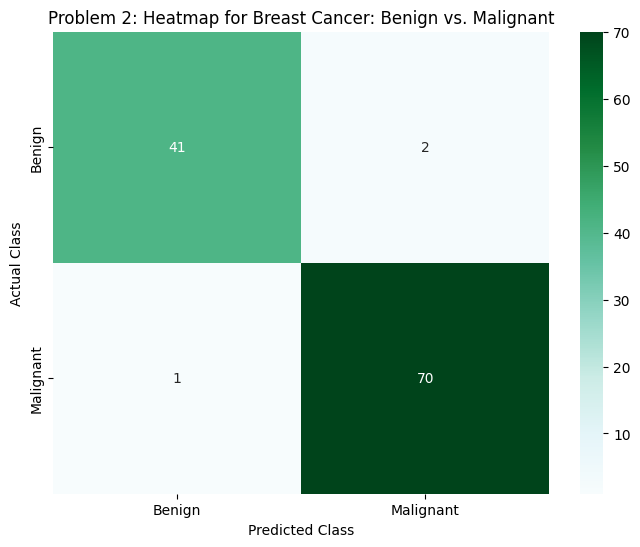

In [9]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuGn", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

plt.title('Problem 2: Heatmap for Breast Cancer: Benign vs. Malignant')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Question 2 - Part 2
*   Add weight penalty
*   Repeat training
*   Report results

In [10]:
# List of C values to test which ones have the best penality
C_values = [0.001, 0.01, 0.1, 1, 10]

# Initialize and fit the model with the current value of C
for C in C_values:
  grid_search = LogisticRegression(max_iter=10000, C=C)
  grid_search.fit(X_train_scaled, y_train)

  # Make predictions on test data
  y_pred = grid_search.predict(X_test_scaled)

  # Calculate performance metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"C = {C}:")
  print(f"  Accuracy: {accuracy:.8f}")
  print(f"  Precision: {precision:.8f}")
  print(f"  Recall: {recall:.8f}")
  print(f"  F1 Score: {f1:.8f}")
  print()

C = 0.001:
  Accuracy: 0.88596491
  Precision: 0.84523810
  Recall: 1.00000000
  F1 Score: 0.91612903

C = 0.01:
  Accuracy: 0.96491228
  Precision: 0.94666667
  Recall: 1.00000000
  F1 Score: 0.97260274

C = 0.1:
  Accuracy: 0.98245614
  Precision: 0.97260274
  Recall: 1.00000000
  F1 Score: 0.98611111

C = 1:
  Accuracy: 0.97368421
  Precision: 0.97222222
  Recall: 0.98591549
  F1 Score: 0.97902098

C = 10:
  Accuracy: 0.97368421
  Precision: 0.98571429
  Recall: 0.97183099
  F1 Score: 0.97872340



### Analysis of C values
With these results, C = 0.1 is the optimal choice for this particular model as it provides the best balance of all metrics (accuracy, precision, recall, and F1 score). It helps the model generalize well without overfitting or underfitting.



# Problem 3
*   Use the cancer dataset to build a naive Bayesian model to classify the type
of cancer (Malignant vs. benign).
*   Use 80% and 20% split between training and evaluation (test)
*   Plot your classification accuracy, precision, recall, and F1 score.
*   Explain and elaborate on your results.
*   Compare your results against the logistic regression classifier you did in Problem 2





In [11]:
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian classifier and fit to training data
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


In [12]:
# Confusion matrix
conf_matrix_3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix_3)

Confusion Matrix: 
 [[40  3]
 [ 1 70]]


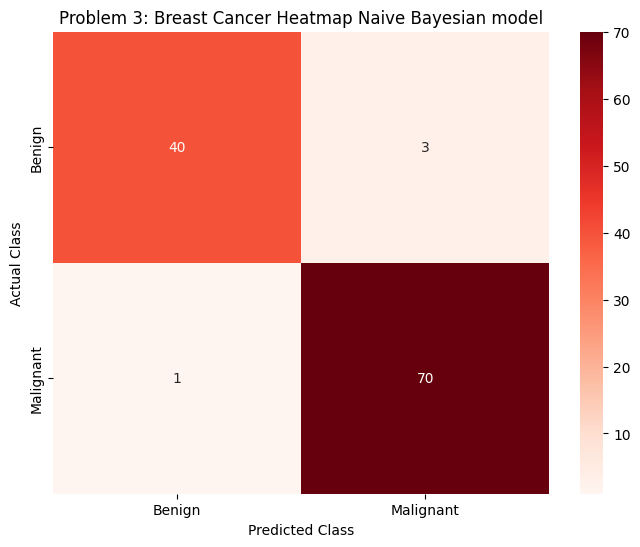

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Reds", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

plt.title('Problem 3: Breast Cancer Heatmap Naive Bayesian model')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Problem 4
*   Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign).
*   Use the PCA feature extraction for your training.
*   Perform N number of independent training (N=1, …, K).
*   Identify the optimum number of K, principal components that achieve the highest classification accuracy.
*   Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks
*   Explain and elaborate on your results and compare it against problems 2 and 3.

In [13]:
from sklearn.decomposition import PCA

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input)

# Train Logistic Regression with PCA for different K values
K_values = range(1, 31)
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform N independent training (1 to K)
N = 10
for K in K_values:
    pca = PCA(n_components=K)
    X_pca = pca.fit_transform(X_scaled)

    # Store performance metrics for each independent training
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for _ in range(N):
        # Split the dataset into training (80%) and testing (20%) sets
        X_train, X_test, y_train, y_test = train_test_split(X_pca, output, test_size=0.2, random_state=np.random.randint(100))

        # Train the Logistic Regression model
        classifier = LogisticRegression(max_iter=10000)
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate performance metrics
        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred))
        recall_list.append(recall_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))

    # Average metrics over N trials and append to overall lists
    accuracies.append(np.mean(accuracy_list))
    precisions.append(np.mean(precision_list))
    recalls.append(np.mean(recall_list))
    f1_scores.append(np.mean(f1_list))


In [14]:
# Finding the optimum K based on the maximum accuracy
optimum_k_index = np.argmax(accuracies)
optimum_k = K_values[optimum_k_index]

print(f"Optimum number of principal components K: {optimum_k}")
print(f"Accuracy: {accuracies[optimum_k_index]:.4f}")
print(f"Precision: {precisions[optimum_k_index]:.4f}")
print(f"Recall: {recalls[optimum_k_index]:.4f}")
print(f"F1 Score: {f1_scores[optimum_k_index]:.4f}")

Optimum number of principal components K: 30
Accuracy: 0.9886
Precision: 0.9860
Recall: 0.9956
F1 Score: 0.9908


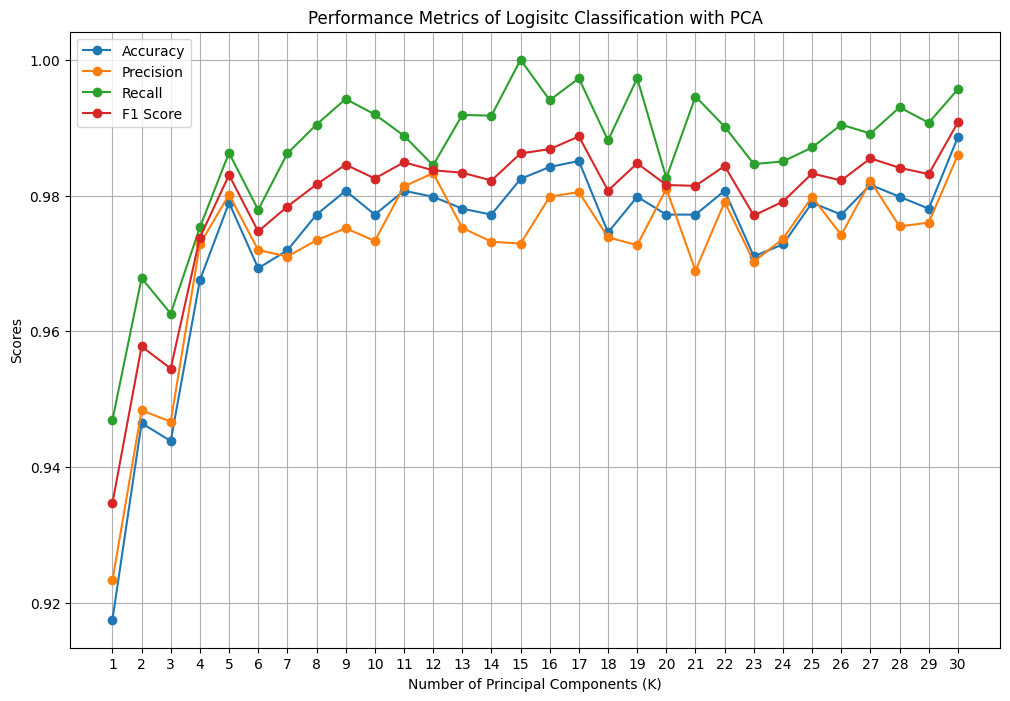

Optimum number of principal components K: 30


In [15]:
plt.figure(figsize=(12, 8))

plt.plot(K_values, accuracies, label='Accuracy', marker='o')
plt.plot(K_values, precisions, label='Precision', marker='o')
plt.plot(K_values, recalls, label='Recall', marker='o')
plt.plot(K_values, f1_scores, label='F1 Score', marker='o')

plt.title('Performance Metrics of Logisitc Classification with PCA')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Scores')
plt.xticks(K_values)
plt.grid()
plt.legend()
plt.show()

# Identify the optimum K
optimum_K = K_values[np.argmax(accuracies)]
print(f'Optimum number of principal components K: {optimum_K}')

# Problem 5
*   Replace the Bayes classifier with logistic regression
*   Report your results (classification accuracy, precision, recall and F1 score)
*   Compare your results against problems 2, 3 and 4.

In [16]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input)

# Train Logistic Regression with PCA for different K values
K_values = range(1, 31)
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform N independent training (1 to K)
N = 10
for K in K_values:
    pca = PCA(n_components=K)
    X_pca = pca.fit_transform(X_scaled)

    # Store performance metrics for each independent training
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for _ in range(N):
        # Split the dataset into training (80%) and testing (20%) sets
        X_train, X_test, y_train, y_test = train_test_split(X_pca, output, test_size=0.2, random_state=np.random.randint(100))

        # Using Bayes classifier
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate performance metrics
        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred))
        recall_list.append(recall_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))

    # Average metrics over N trials and append to overall lists
    accuracies.append(np.mean(accuracy_list))
    precisions.append(np.mean(precision_list))
    recalls.append(np.mean(recall_list))
    f1_scores.append(np.mean(f1_list))

In [17]:
# Find the optimum K
optimum_k_index = np.argmax(accuracies)
optimum_k = K_values[optimum_k_index]
optimum_accuracy = accuracies[optimum_k_index]
optimum_precision = precisions[optimum_k_index]
optimum_recall = recalls[optimum_k_index]
optimum_f1_score = f1_scores[optimum_k_index]

print(f"Optimum number of principal components K: {optimum_k}")
print(f"Accuracy: {optimum_accuracy:.4f}")
print(f"Precision: {optimum_precision:.4f}")
print(f"Recall: {optimum_recall:.4f}")
print(f"F1 Score: {optimum_f1_score:.4f}")

Optimum number of principal components K: 6
Accuracy: 0.9430
Precision: 0.9490
Recall: 0.9632
F1 Score: 0.9559


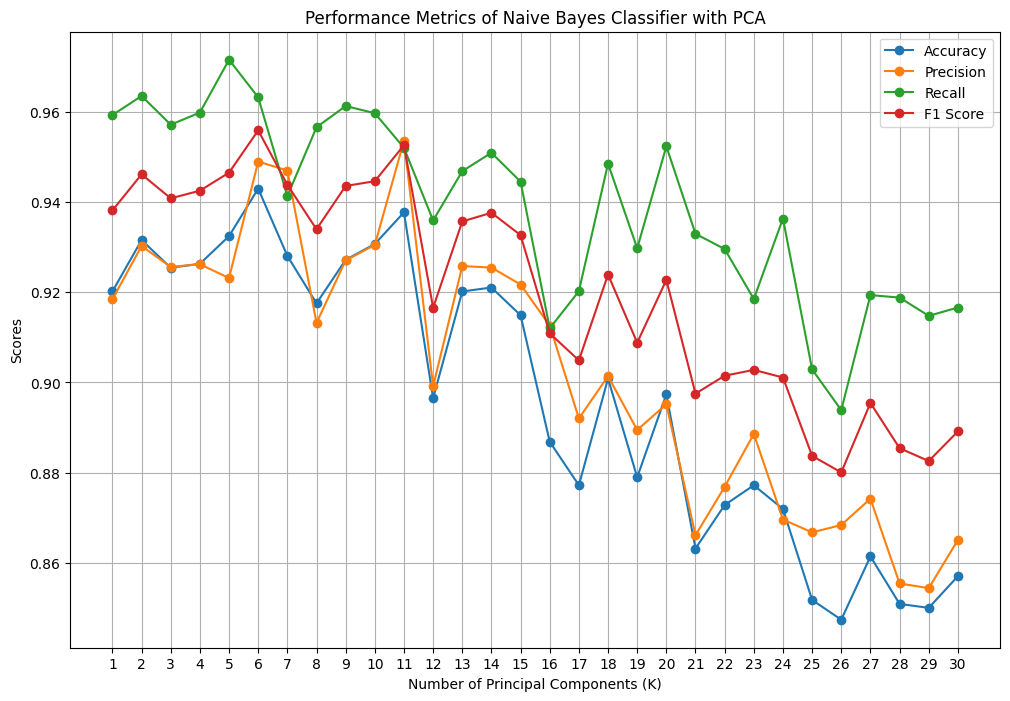

Optimum number of principal components K: 6


In [18]:
plt.figure(figsize=(12, 8))

plt.plot(K_values, accuracies, label='Accuracy', marker='o')
plt.plot(K_values, precisions, label='Precision', marker='o')
plt.plot(K_values, recalls, label='Recall', marker='o')
plt.plot(K_values, f1_scores, label='F1 Score', marker='o')

plt.title('Performance Metrics of Naive Bayes Classifier with PCA')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Scores')
plt.xticks(K_values)
plt.grid()
plt.legend()
plt.show()

# Identify the optimum K
optimum_K = K_values[np.argmax(accuracies)]
print(f'Optimum number of principal components K: {optimum_K}')